# Initial examples (Supervised Learning)


> *A regression model provides a function that describes the relationship between **one or more independent variables** and a **response, dependent, or target variable**.*

- Input variables (X, attributes, features, variables)
- Output **target** variable (*y*, target, label)

## The goal is to find a function *f* that fulfills: ***y = f(X)***

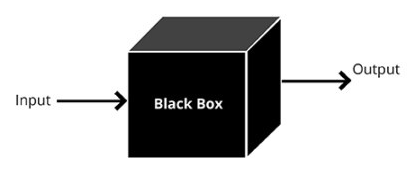

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
rng = np.random.RandomState(1)
N = 500
x = 10 * rng.rand(N)

y = np.sin(x) + np.log(x) + (0.5 * rng.randn(N))   # SECRET FUNCTION

plt.scatter(x, y)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1, 1)
model.fit(X, y)

In [ ]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
yfit = model.predict(xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(X))**2).mean():.4f}')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.show()

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(15, include_bias=False)
Xp = poly.fit_transform(x[:, None])
model = LinearRegression(fit_intercept=True)
model.fit(Xp, y)
print(list(zip(x[:3], y[:3])))

In [ ]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(Xp))**2).mean():.4f}')
plt.xlim(left=-1, right=11)
print('y =',  ' + '.join([f'{model.intercept_:.2f}'] + [f'{c:.3f}·x**{i+1}' for i, c  in enumerate(model.coef_)] ))

### Control overfitting

### Ridge Regression ($L_2 Regularization$)
$L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=2.0)
model.fit(Xp, y)

In [ ]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Absolute Error: {((y-model.predict(Xp))**2).mean():.4f}')
plt.xlim(left=-1, right=11)
print('y =',  [f'{c:.2f} x**{i} +' for i, c  in enumerate(model.coef_)] )

### Neural Networks

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(1,)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="linear"),
])
model.summary()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(0.005), 
              loss="mse", metrics=['mse'],)
model.fit(X,y, batch_size=32, epochs=500,)

In [ ]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(X).squeeze())**2).mean():.4f}')
plt.xlim(left=-1, right=11);

## Neural Networks + Polynomial features

In [ ]:
poly = PolynomialFeatures(3, include_bias=False)
Xp = poly.fit_transform(X)

model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(3,)),
    keras.layers.Dense(8, activation="relu",),
    keras.layers.Dense(1, activation="linear"),
])

model.compile(optimizer=keras.optimizers.Adam(0.0025), 
              loss="mse", metrics=['mse']
              )
model.fit(Xp, y, batch_size=16, epochs=500)



In [ ]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(Xp).squeeze())**2).mean():.4f}')
plt.xlim(left=-1, right=11)